In [1]:
import sys
import os
# sys.path.insert(0, os.path.abspath('../models'))
# print(sys.path)
from models.pre_processor.rdr_sparse_processor import *
import yaml
from utils.util_config import cfg, cfg_from_yaml_file
from datasets.kradar_detection_v2_0 import KRadarDetection_v2_0

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
cfg_path = './configs/cfg_RTNH_wide.yml'
cfg = cfg_from_yaml_file(cfg_path, cfg)
processor = RadarSparseProcessor(cfg)

In [7]:
test_dataset = KRadarDetection_v2_0(cfg = cfg, split='test')

data_loader = torch.utils.data.DataLoader(test_dataset, \
                batch_size=1, shuffle=False, collate_fn=test_dataset.collate_fn, \
                num_workers = 1)

In [8]:
data = next(iter(data_loader))

In [10]:
meta = data['meta']
rdr_sparse = data['rdr_sparse']
print(meta)
print(rdr_sparse.shape)

res = processor(data)
print(res.keys())

[{'header': '../data/sequences', 'seq': '1', 'label_v1_0': '../data/sequences/1/info_label/00182_00150.txt', 'label_v1_1': './tools/revise_label/kradar_revised_label_v1_1/1_info_label_revised/00182_00150.txt', 'label_v2_0': './tools/revise_label/kradar_revised_label_v2_0/KRadar_refined_label_by_UWIPL/1/00182_00150.txt', 'label_v2_1': './tools/revise_label/kradar_revised_label_v2_1/KRadar_revised_visibility/1/00182_00150.txt', 'split': 'test', 'calib': [-2.54, 0.3, 0.7], 'path': {'calib': '../data/sequences/1/info_calib/calib_radar_lidar.txt', 'ldr64': '../data/sequences/1/os2-64/os2-64_00150.pcd', 'desc': '../data/sequences/1/description.txt'}, 'idx': {'rdr': '00182', 'ldr64': '00150', 'camf': '00449', 'ldr128': '00150', 'camr': '00451', 'tstamp': '1643292961.606203716'}, 'label': [('Sedan', (31.583760033488353, -2.59537762468527, 0.29849518120149887, -0.005941100773788695, 3.2818552181144063, 1.613238582395025, 1.4197772388134822), 1, 'R'), ('Sedan', (43.08875652567415, 4.366695962451

In [14]:
res['sp_features'].shape
res['sp_indices'][1]

tensor([ 0,  0,  0, 33], dtype=torch.int32)

In [3]:
import numpy as np

splat = np.load('../../../data/rdr_splt_data/1/sprdr_00033.npy')
print(splat.shape)

(3612, 4)


(3612, 4)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

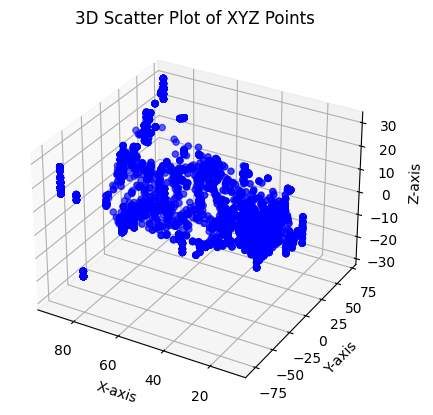

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(splat.shape)
# Create the 3D scatter plot
ax.scatter(splat[:, 0], splat[:, 1], splat[:, 2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')

In [7]:
sparse = np.load('../../../data/rdr_sparse_data/sparse_radar_tensor_wide_range/rtnh_wider_1p_1/1/sprdr_00033.npy')
print(sparse.shape)

(150000, 4)


(150000, 4)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

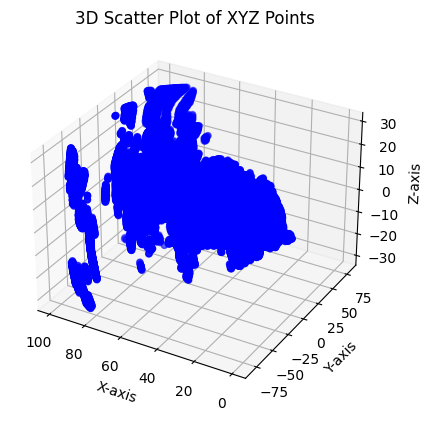

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(sparse.shape)
# Create the 3D scatter plot
ax.scatter(sparse[:, 0], sparse[:, 1], sparse[:, 2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')

In [12]:
from pypcd4 import PointCloud
pc = PointCloud.from_path('../../../data/sequences/1/os2-64/os2-64_00033.pcd')
points = pc.numpy()
ldr= points[:, :4]
print(ldr.shape)

(131072, 4)


(131072, 4)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

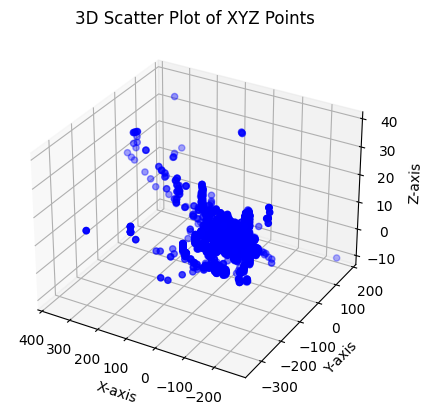

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(ldr.shape)
# Create the 3D scatter plot
ax.scatter(ldr[:, 0], ldr[:, 1], ldr[:, 2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')

(15000, 4)
(15000, 4)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

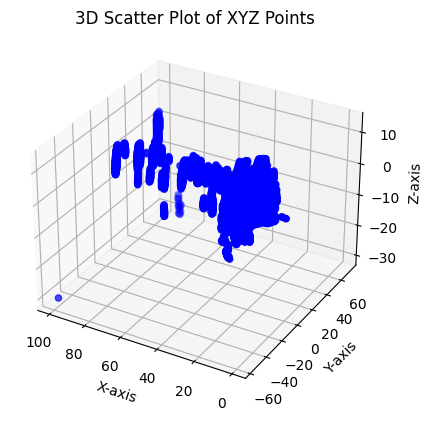

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('../../../data/sequences/gen_sparse_rdr/rtnh_wider_01p_1/1/sprdr_00033.npy')
print(data.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(data.shape)
# Create the 3D scatter plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')